# Exercices liés aux données d’AmesHousing. 
Je vais organiser l'ensemble de la description de votre dataset en reprenant les éléments clés et en les organisant de manière à ce que vous puissiez intégrer ces informations dans vos exercices précédents.

### Données de AmesHousing

**Nom du fichier**: AmesHousing.txt  
**Type**: Population  
**Taille**: 2930 observations, 82 variables  
**Source**: Bureau des évaluations d'Ames, Iowa  
**Période**: 2006-2010  

### Variables
- **Nominales**: 23 variables
- **Ordinales**: 23 variables
- **Discrètes**: 14 variables
- **Continuelles**: 20 variables  
- **Identifiants d'observation**: 2 variables supplémentaires

### Variables Clés

1. **Order** (Discrète): Numéro d'observation  
2. **PID** (Nominale): Numéro d'identification du parcel  
3. **MS SubClass** (Nominale): Type de logement (Ex: 1-STORY 1946 & NEWER)  
4. **MS Zoning** (Nominale): Classification du zonage (Ex: A = Agriculture, C = Commercial)  
5. **Lot Frontage** (Continue): Longueur en pieds de la rue connectée à la propriété  
6. **Lot Area** (Continue): Taille du lot en pieds carrés  
7. **Street** (Nominale): Type d'accès routier (Pave, Gravel)  
8. **Alley** (Nominale): Type d'accès à l'allée (Pave, Gravel, NA)  
9. **Lot Shape** (Ordinale): Forme générale de la propriété (Ex: Regular, IR1, IR2)  
10. **Land Contour** (Nominale): Planéité de la propriété (Ex: Lvl = Plat, Bnk = Banc)  
11. **Utilities** (Ordinale): Type de services publics disponibles (Ex: AllPub = tous les services publics)  
12. **Lot Config** (Nominale): Configuration du terrain (Ex: Inside, Corner)  
13. **Land Slope** (Ordinale): Pente de la propriété (Ex: Gtl = Pente douce)  
14. **Neighborhood** (Nominale): Localisation dans Ames (Ex: Blmngtn = Bloomington Heights)  
15. **Condition 1 et 2** (Nominales): Proximité de diverses conditions (Ex: Artery = Rue principale, Feedr = Rue secondaire)  
16. **Bldg Type** (Nominale): Type de logement (Ex: 1Fam = Maison individuelle, Duplx = Duplex)  
17. **House Style** (Nominale): Style du logement (Ex: 1Story = Une seule histoire, 2Story = Deux histoires)  
18. **Overall Qual** (Ordinale): Qualité générale du logement (Ex: 10 = Très Excellent, 1 = Très Mauvais)  
19. **Overall Cond** (Ordinale): Condition générale du logement  
20. **Year Built** (Discrète): Année de construction originale  
21. **Year Remod/Add** (Discrète): Année de remodelage ou d'ajout (si applicable)  
22. **Roof Style** (Nominale): Type de toit (Ex: Gable = Pignon, Hip = Croupe)  
23. **Exter Qual** (Ordinale): Qualité des matériaux extérieurs (Ex: Ex = Excellent, Gd = Bon, Fa = Juste)  
24. **Foundation** (Nominale): Type de fondation (Ex: BrkTil = Briques et tuiles, CBlock = Parpaings)  
25. **Bsmt Qual** (Ordinale): Hauteur du sous-sol (Ex: Ex = Excellent, NA = Pas de sous-sol)  
26. **Heating** (Nominale): Type de chauffage (Ex: GasA = Chauffage à air chaud à gaz)  
27. **Central Air** (Nominale): Climatisation centrale (Ex: Y = Oui, N = Non)  
28. **Electrical** (Ordinale): Système électrique (Ex: SBrkr = Disjoncteurs standards)  
29. **Gr Liv Area** (Continue): Surface habitable au-dessus du niveau du sol (pieds carrés)  
30. **TotRmsAbvGrd** (Discrète): Nombre total de pièces au-dessus du sol  
31. **Functional** (Ordinale): Fonctionnalité du logement (Ex: Typ = Fonctionnalité typique)  
32. **Fireplaces** (Discrète): Nombre de cheminées  
33. **Garage Type** (Nominale): Emplacement du garage (Ex: Attchd = Attaché, Detchd = Détaché)  
34. **Garage Cars** (Discrète): Nombre de voitures que le garage peut contenir  
35. **Garage Area** (Continue): Surface du garage en pieds carrés  
36. **Garage Qual** (Ordinale): Qualité du garage (Ex: Ex = Excellent, Gd = Bon)  
37. **SalePrice** (Continue): Prix de vente (Variable cible)

---

### Objectifs d’Analyse
L'objectif est de prédire les prix de vente des propriétés en fonction de ces nombreuses caractéristiques. Vous pouvez utiliser ces variables pour construire un modèle de prédiction, effectuer une analyse de corrélation, ou évaluer l'importance de chaque caractéristique dans le modèle de prédiction.  


---
**Configuration du système**

In [131]:
# Importation des bibliothèques nécessaires
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from category_encoders import MEstimateEncoder
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor

# Configuration par défaut de Matplotlib
plt.style.use("seaborn-v0_8-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

**Application de la PCA**

In [134]:
def apply_pca(X, standardize=True):
    # Standardisation des données
    if standardize:
        X = (X - X.mean(axis=0)) / X.std(axis=0)
    # Création des composantes principales
    pca = PCA()
    X_pca = pca.fit_transform(X)
    # Conversion en DataFrame
    component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
    X_pca = pd.DataFrame(X_pca, columns=component_names)
    # Création des charges factorielles
    loadings = pd.DataFrame(
        pca.components_.T,  # transposition de la matrice des charges factorielles
        columns=component_names,  # les colonnes sont les composantes principales
        index=X.columns,  # les lignes correspondent aux variables initiales
    )
    return pca, X_pca, loadings


**Visualisation de la variance expliquée**

In [137]:
def plot_variance(pca, width=8, dpi=100):
    # Création de la figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Variance expliquée
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Composante", title="% de Variance Expliquée", ylim=(0.0, 1.0)
    )
    # Variance Cumulative
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Composante", title="% de Variance Cumulative", ylim=(0.0, 1.0)
    )
    # Configuration de la figure
    fig.set(figwidth=8, dpi=100)
    return axs


**Calcul des Scores d’Information Mutuelle**

In [140]:
def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # Toutes les variables discrètes doivent maintenant avoir un type entier
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


**Évaluation du modèle**

In [143]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

def score_dataset(X, y, model=None):
    if model is None:
        model = XGBRegressor()  # Initialisation correcte du modèle

    # Encodage des variables catégorielles
    X = X.copy()  # Évite de modifier le DataFrame original
    for colname in X.select_dtypes(["category", "object"]):
        X[colname], _ = X[colname].factorize()

    # Vérification que le modèle est bien défini
    if model is None:
        raise ValueError("Le modèle passé à score_dataset est None. Assurez-vous de bien l'initialiser.")

    # La métrique utilisée pour cette compétition est le RMSLE (Root Mean Squared Log Error)
    score = cross_val_score(model, X, y, cv=5, scoring="neg_mean_squared_log_error")

    score = -1 * score.mean()
    score = np.sqrt(score)

    return score


---
**Importer et exploiter les données AmesHousing**

In [146]:
# Chargement du dataset Ames
df = pd.read_csv("ames.csv")
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YearSold,SaleType,SaleCondition,SalePrice
0,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141.0,31770.0,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,0.0,No_Pool,No_Fence,NaN,0.0,5,2010,WD,Normal,215000
1,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80.0,11622.0,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,0.0,No_Pool,Minimum_Privacy,NaN,0.0,6,2010,WD,Normal,105000
2,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81.0,14267.0,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,0.0,No_Pool,No_Fence,Gar2,12500.0,6,2010,WD,Normal,172000
3,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93.0,11160.0,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,...,0.0,No_Pool,No_Fence,NaN,0.0,4,2010,WD,Normal,244000
4,Two_Story_1946_and_Newer,Residential_Low_Density,74.0,13830.0,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,0.0,No_Pool,Minimum_Privacy,NaN,0.0,3,2010,WD,Normal,189900


---
# 1. Etude sur la variable cible "Prix de vente"

**Choix des caractéristiques à encoder**

Nous allos d’abord choisir les caractéristiques sur lesquelles appliquer un encodage cible. Les variables catégorielles avec un grand nombre de catégories sont souvent de bons candidats.

In [265]:
# Sélection des 3 variables catégorielles ayant le plus grand nombre de catégories
top_3_categorical = df.select_dtypes(["object"]).nunique().nlargest(3)
print(top_3_categorical)


Neighborhood    28
Exterior2nd     17
MSSubClass      16
dtype: int64


In [267]:
# sous la forme de liste
top_3_categorical_features = top_3_categorical.index.tolist()
print(top_3_categorical_features)


['Neighborhood', 'Exterior2nd', 'MSSubClass']


**Application de l’encodage cible**

On va appliquer l'encodage cible (Target Encoding) sur ces variables. Pour éviter le surapprentissage, on va d'abord diviser les données en un jeu d'encodage et un jeu d'entraînement. Ensuite, on utilisera la **M-Estimate Encoding** pour lisser les valeurs.

In [270]:
# Séparer une partie des données pour l'encodage
X_encode = df.sample(frac=0.20, random_state=0)
y_encode = X_encode.pop("SalePrice")

# Le reste pour l'entraînement
X_pretrain = df.drop(X_encode.index)
y_train = X_pretrain.pop("SalePrice")


#### Appliquer l'encodage cible avec M-Estimate Encoding
On va tester m = 5 et comparer les scores RMSLE.

In [273]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

def score_dataset(X, y, model=None):
    # Si le modèle est None, on crée un modèle par défaut
    if model is None:
        model = XGBRegressor()

    # Encodage des variables catégorielles
    X = X.copy()  # Évite de modifier le DataFrame original
    for colname in X.select_dtypes(["category", "object"]):
        X[colname], _ = X[colname].factorize()

    # Vérification que le modèle est bien défini
    if model is None:
        raise ValueError("Le modèle passé à score_dataset est None. Assurez-vous de bien l'initialiser.")

    # La métrique utilisée pour cette compétition est le RMSLE (Root Mean Squared Log Error)
    score = cross_val_score(model, X, y, cv=5, scoring="neg_mean_squared_log_error")

    score = -1 * score.mean()
    score = np.sqrt(score)

    return score


In [275]:
from category_encoders import MEstimateEncoder

# Création de l'encodeur avec les caractéristiques sélectionnées
m = 5
encoder = MEstimateEncoder(cols=top_3_categorical_features, m=m)

# Entraînement de l'encodeur sur le jeu d'encodage
encoder.fit(X_encode[top_3_categorical_features], y_encode)

# Transformation du jeu d'entraînement
X_train = X_pretrain.copy()
X_train[top_3_categorical_features] = encoder.transform(X_pretrain[top_3_categorical_features])


**Visualiser la relation entre les caractéristiques encodées et la cible**

C:\Users\Optimiste\AppData\Local\Temp\ipykernel_17688\2681295441.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_train, kde=True, hist=False)
C:\Users\Optimiste\AppData\Local\Temp\ipykernel_17688\2681295441.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(X_train[feat

Text(0.5, 0, 'SalePrice')

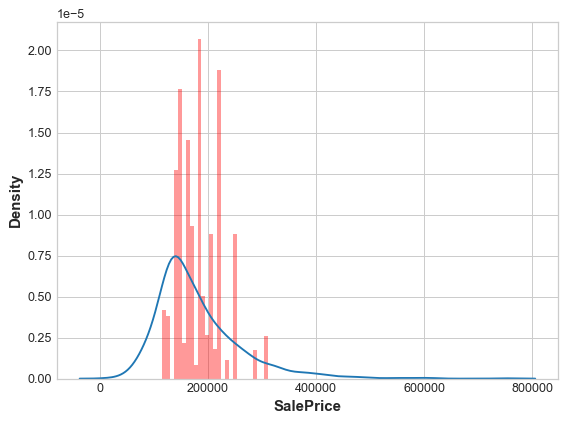

In [278]:
feature = encoder.cols

plt.figure(dpi=90)
ax = sns.distplot(y_train, kde=True, hist=False)
ax = sns.distplot(X_train[feature], color='r', ax=ax, hist=True, kde=False, norm_hist=True)
ax.set_xlabel("SalePrice")

In [280]:
from sklearn.model_selection import cross_val_score

def score_dataset(X, y, model=None):
    if model is None:
        from sklearn.ensemble import RandomForestRegressor
        model = RandomForestRegressor(n_estimators=100)

    # Encodage des variables catégorielles si nécessaire
    X = X.copy()
    for colname in X.select_dtypes(["object"]):
        X[colname], _ = X[colname].factorize()

    # Évaluation du modèle avec cross-validation
    try:
        score = cross_val_score(
            model, X, y, cv=5, scoring="neg_mean_squared_log_error"
        )
        score = -1 * score.mean()
        return np.sqrt(score)
    except AttributeError as e:
        print(f"Erreur : {e}")
        return None


In [282]:
X = df.copy()
y = X.pop("SalePrice")

# Score sans encodage (baseline)
score_base = score_dataset(X, y)

# Score avec encodage
score_new = score_dataset(X_train, y_train)

print(f"Baseline Score: {score_base:.4f} RMSLE")
print(f"Score with Encoding: {score_new:.4f} RMSLE")


Baseline Score: 0.1450 RMSLE
Score with Encoding: 0.1438 RMSLE


---

## Etape 1 : Information mutuelle (MI)

In [91]:
# Fonctions utilitaires issues du tutoriel
def make_mi_scores(X, y):
    """
    Calcule les scores d'information mutuelle pour chaque caractéristique de X par rapport à y.
    """
    X = X.copy()
    # Encodage des variables catégorielles
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # Vérification des caractéristiques discrètes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    # Calcul des scores d'information mutuelle
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    # Tri des scores dans l'ordre décroissant
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

def plot_mi_scores(scores):
    """
    Trace un graphique en barres horizontales des scores d'information mutuelle.
    """
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


#### 1. Analyse des Scores d'Information Mutuelle pour le Dataset Ames
L'objectif ici est d'identifier les caractéristiques du dataset Ames ayant le plus grand potentiel pour expliquer la variable cible SalePrice (le prix de vente).

OverallQual     0.581262
Neighborhood    0.569813
GrLivArea       0.496909
YearBuilt       0.437939
GarageArea      0.415014
TotalBsmtSF     0.390280
GarageCars      0.381467
FirstFlrSF      0.368825
BsmtQual        0.364779
KitchenQual     0.326194
ExterQual       0.322390
YearRemodAdd    0.315402
MSSubClass      0.287131
GarageFinish    0.265440
FullBath        0.251693
Foundation      0.236115
LotFrontage     0.233334
GarageType      0.226117
FireplaceQu     0.221955
SecondFlrSF     0.200658
Name: MI Scores, dtype: float64


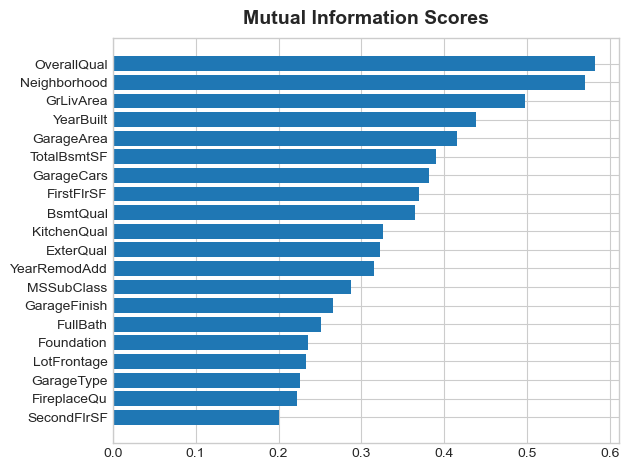

In [94]:
X = df.copy()
y = X.pop('SalePrice')

mi_scores = make_mi_scores(X, y)  #Calcul des scores d'information mutuelle (MI) 

#Affichage des résultats
print(mi_scores.head(20))
plot_mi_scores(mi_scores.head(20))

Cela montre que **OverallQual** et **Neighborhood** sont les deux caractéristiques les plus fortement corrélées avec SalePrice, ce qui signifie qu'elles jouent un rôle important dans la prédiction du prix de vente des maisons.

#### 2. Visualisation des relations continues avec SalePrice

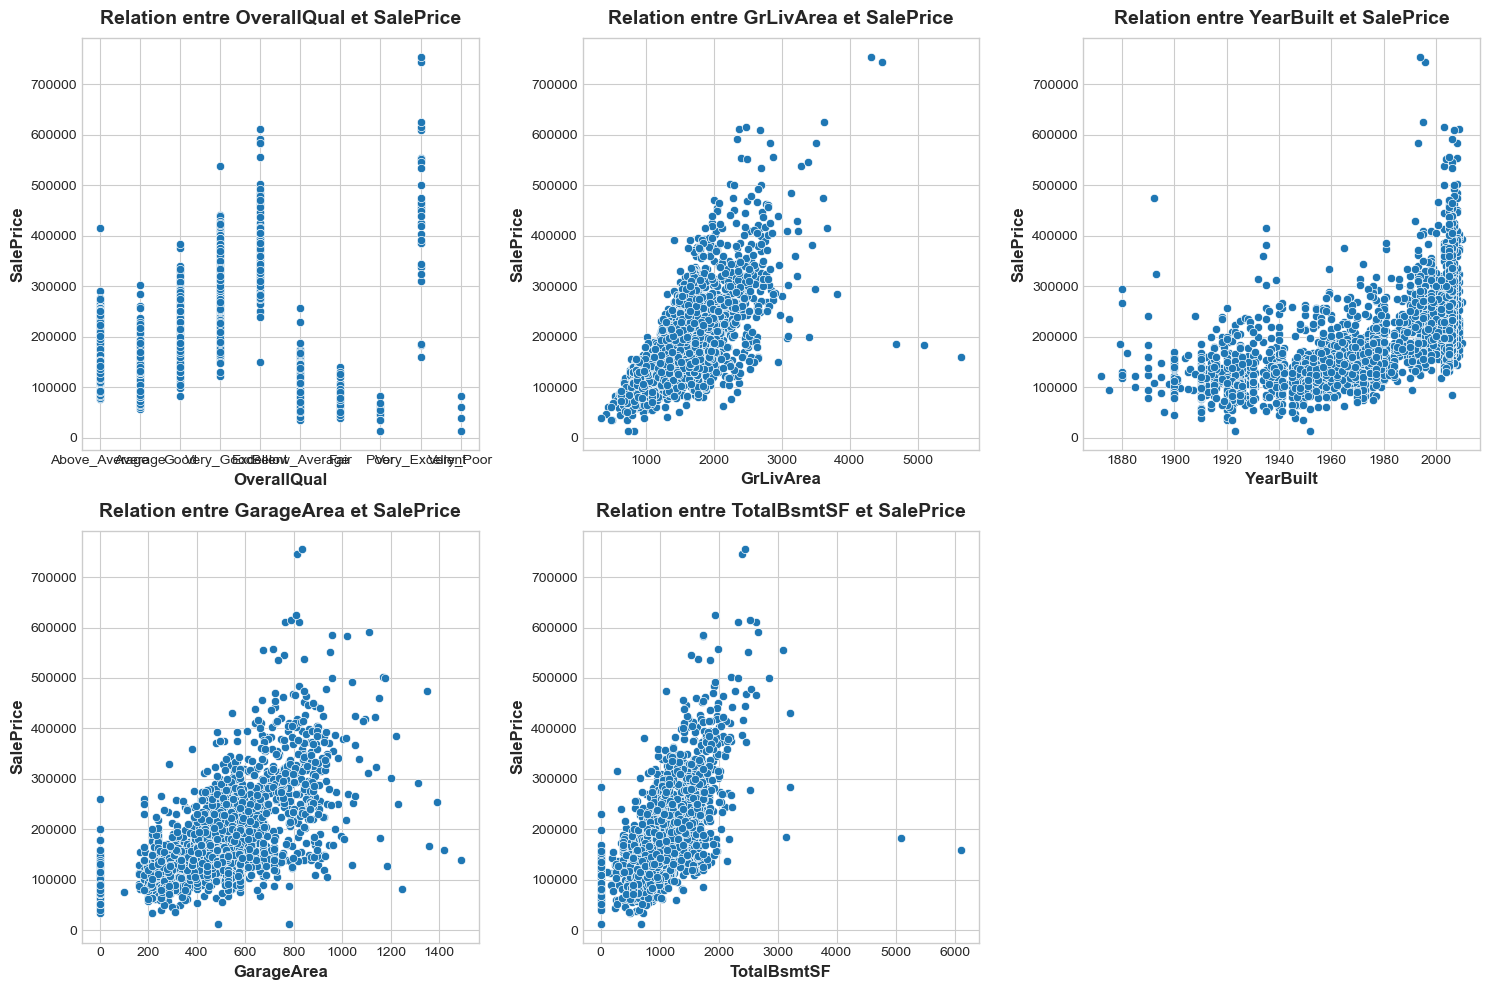

In [98]:
# Visualisation des relations continues avec SalePrice
features_continues = ['OverallQual', 'GrLivArea', 'YearBuilt', 'GarageArea', 'TotalBsmtSF']
plt.figure(figsize=(15, 10))

for i, feature in enumerate(features_continues, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(data=df, x=feature, y='SalePrice')
    plt.title(f'Relation entre {feature} et SalePrice')

plt.tight_layout()
plt.show()

#### 3. Visualisation des relations catégorielles avec SalePrice (exemples : Neighborhood, BsmtQual, KitchenQual)


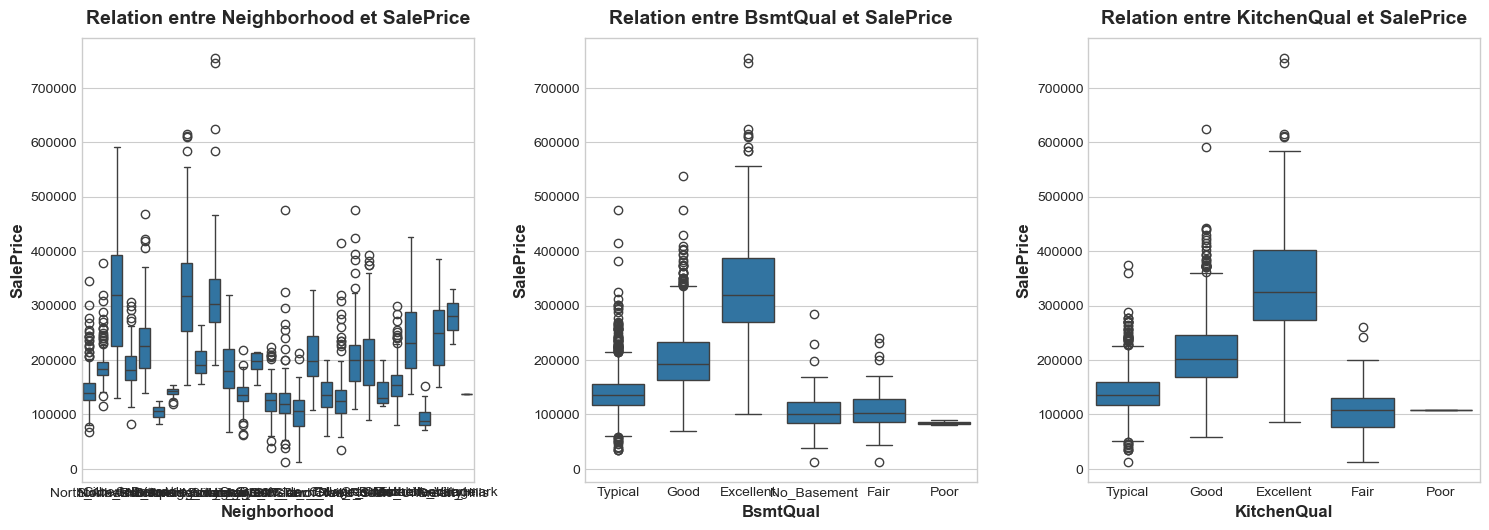

In [101]:
# Visualisation des relations catégorielles avec SalePrice (exemples : Neighborhood, BsmtQual, KitchenQual)
features_categorielles = ['Neighborhood', 'BsmtQual', 'KitchenQual']
plt.figure(figsize=(15, 10))

for i, feature in enumerate(features_categorielles, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, x=feature, y='SalePrice')
    plt.title(f'Relation entre {feature} et SalePrice')

plt.tight_layout()
plt.show()

#### 4. Corrélations entre les variables continues sélectionnées


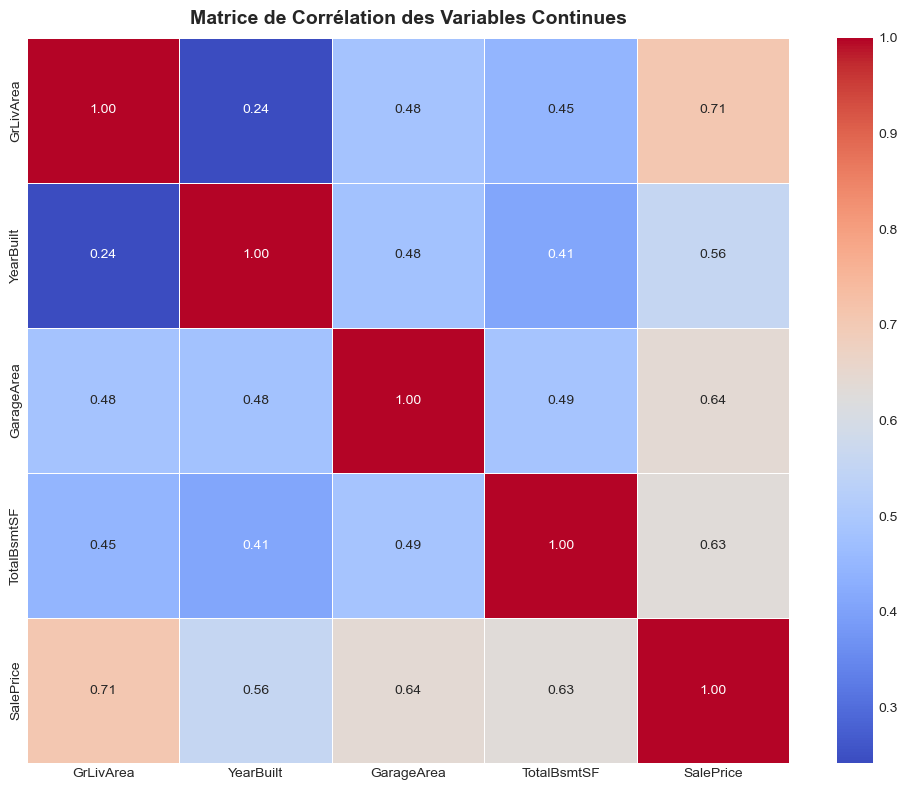

In [104]:
# Sélectionner uniquement les colonnes numériques
numeric_features = df[features_continues + ['SalePrice']].select_dtypes(include=[np.number])

# Calculer la matrice de corrélation
corr_matrix = numeric_features.corr()

# Visualisation de la matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Matrice de Corrélation des Variables Continues")
plt.show()


#### 5. Analyse de la tendance des moyennes des prix de vente par catégorie (ex. Neighborhood)


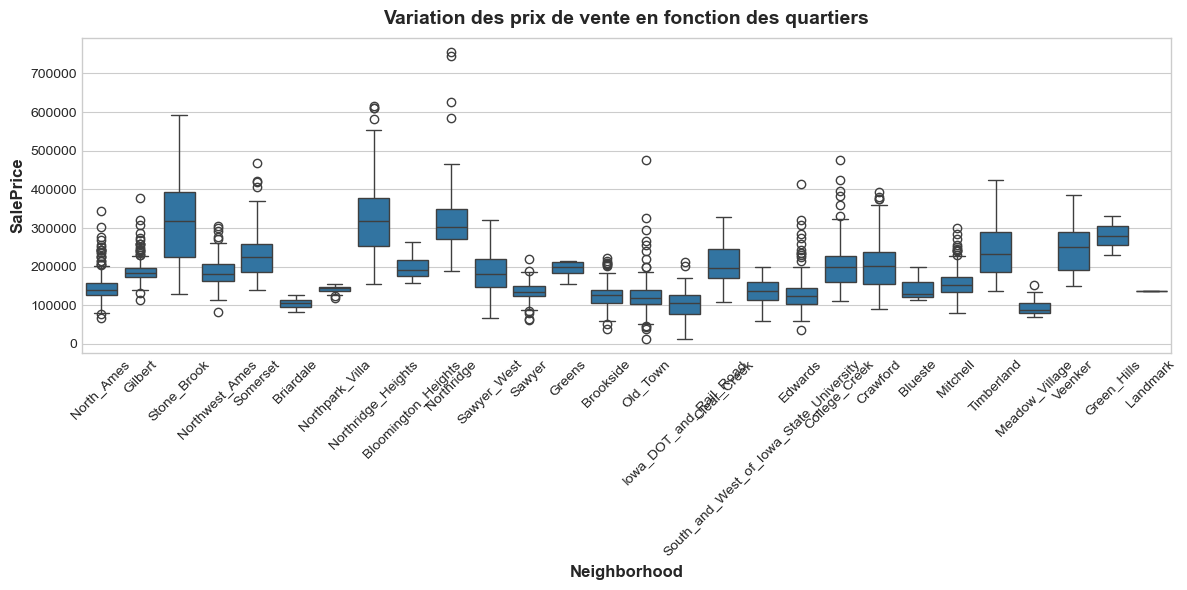

In [107]:
# Analyse de la tendance des moyennes des prix de vente par catégorie (ex. Neighborhood)
plt.figure(figsize=(12, 6))
sns.boxplot(x='Neighborhood', y='SalePrice', data=df)
plt.title('Variation des prix de vente en fonction des quartiers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

---

# Etape 2 : Création de nouvelles fonctionnalités
Pour la création de nouvelles fonctionnalités (ou features) dans un modèle prédictif, nous pouvons nous inspirer de pratiques courantes basées sur des études antérieures en sciences des données et en immobilier. Voici quelques transformations mathématiques qui ont prouvé leur efficacité dans l'amélioration des modèles prédictifs, notamment dans le cadre de l'évaluation des prix immobiliers :

#### 1. Création de nouvelles caractéristiques à partir des données existantes
Nous allons commencer par créer des fonctionnalités basées sur les relations logiques entre les variables existantes. Voici quelques idées courantes :

##### a. Surface Totale de la Maison (Total Floor Area)
La somme des surfaces des différents étages peut offrir une vue plus complète de la taille totale de la maison.

```
df['TotalFlrSF'] = df['GrLivArea'] + df['FirstFlrSF'] + df['SecondFlrSF']

```

#### b. Âge de la maison
Au lieu de travailler directement avec l'année de construction ou de rénovation, nous pouvons calculer l'âge de la maison, ce qui peut être un meilleur indicateur de son état général.
```
df['Age'] = df['YrSold'] - df['YearBuilt']
df['RemodAge'] = df['YrSold'] - df['YearRemodAdd']

```

#### c. Surface des sous-sols
Certaines maisons peuvent avoir de grands sous-sols qui ne sont pas comptabilisés dans la surface habitable principale. Nous pouvons créer une fonctionnalité qui exprime la surface habitable totale incluant les sous-sols.

```
df['TotalBsmtSF'] = df['TotalBsmtSF'] + df['BsmtFinSF1'] + df['BsmtFinSF2']
```

#### d. Ratio Surface / Nombre de Chambres
Une autre approche consiste à diviser la surface totale de la maison par le nombre de chambres pour créer un indicateur de "densité de l'espace".

```
df['FlrAreaPerBedroom'] = df['GrLivArea'] / df['TotRmsAbvGrd']
```

#### e. Ratio du Nombre de Garages / Surface du Garage
Une nouvelle fonctionnalité qui peut être utile dans certains cas est le ratio entre la surface du garage et le nombre de voitures qu’il peut contenir.

```
df['GarageAreaPerCar'] = df['GarageArea'] / df['GarageCars']
```

#### f. Interaction entre la qualité des matériaux et l'âge de la maison
Le vieillissement des matériaux peut avoir un impact sur la valeur d’une maison. En combinant la qualité de l'extérieur (comme ExterQual) et l'âge de la maison, nous pouvons créer une nouvelle caractéristique.

```
df['ExterQualAgeInteraction'] = df['ExterQual'].map({"Excellent": 1, "Good": 2, "TA": 3, "Fair": 4, "Po": 5}) * df['Age']
```

#### g. Surface des terrains par rapport à la taille des maisons
La surface du terrain peut également être un facteur clé dans l'évaluation du prix de la maison. Nous pouvons créer un ratio entre la surface du terrain et la surface de la maison pour déterminer si un terrain est plus grand ou plus petit par rapport à la surface de la maison.

```
df['LotAreaPerFlrArea'] = df['LotArea'] / df['GrLivArea']
```

---

### 2. Encodage des variables catégorielles
Les variables catégorielles telles que Neighborhood, ExterCond, GarageFinish, etc., peuvent avoir un impact important sur le prix. Nous pouvons les encoder de manière numérique, mais aussi effectuer des transformations basées sur la fréquence ou les groupes de caractéristiques similaires.

Voici un exemple d'encodage basé sur la moyenne de la cible (SalePrice) par catégorie.

```
# Encodage de 'Neighborhood' basé sur la moyenne du prix de vente
df['Neighborhood_MeanPrice'] = df.groupby('Neighborhood')['SalePrice'].transform('mean')
```

---
### 3. Traitement des valeurs manquantes et des valeurs extrêmes
Si des variables contiennent des valeurs manquantes ou des outliers, nous devons les traiter avant de les utiliser dans les modèles.

```
# Imputation des valeurs manquantes par la médiane (par exemple, pour les surfaces)
df['BsmtFinSF1'].fillna(df['BsmtFinSF1'].median(), inplace=True)
```

---
### 4. Transformation logarithmique des variables skewed
Certaines variables comme la surface du terrain ou le prix de vente (SalePrice) peuvent être fortement biaisées. Appliquer une transformation logarithmique peut souvent améliorer la performance du modèle.

```
df['LogSalePrice'] = np.log(df['SalePrice'])
df['LogGrLivArea'] = np.log(df['GrLivArea'])
```

---
**A étudier prochainement !**

5. Création de nouvelles caractéristiques sur la base de la saisonnalité et de l'économie :
Pour les maisons qui ont des caractéristiques temporelles, comme les rénovations effectuées pendant certaines périodes de l'année, ou la vente pendant des périodes économiquement intéressantes, nous pouvons intégrer des informations de type saisonnier ou macroéconomique.

**Création de nouvelles fonctionnalités**

In [125]:
from datetime import datetime  # Assurez-vous d'importer datetime

current_year = datetime.now().year  # Obtenir l'année actuelle


# Transformation des caractéristiques
df['TotalFlrSF'] = df['GrLivArea'] + df['FirstFlrSF'] + df['SecondFlrSF']
df['Age'] = current_year - df['YearBuilt']
df['RemodAge'] = current_year - df['YearRemodAdd']
df['TotalBsmtSF'] = df['TotalBsmtSF'] + df['BsmtFinSF1'] + df['BsmtFinSF2']
df['FlrAreaPerBedroom'] = df['GrLivArea'] / df['TotRmsAbvGrd']
df['GarageAreaPerCar'] = df['GarageArea'] / df['GarageCars']
df['ExterQualAgeInteraction'] = df['ExterQual'].map({"Excellent": 1, "Good": 2, "TA": 3, "Fair": 4, "Po": 5}) * df['Age']
df['LotAreaPerFlrArea'] = df['LotArea'] / df['GrLivArea']
df['Neighborhood_MeanPrice'] = df.groupby('Neighborhood')['SalePrice'].transform('mean')

# Sélectionner uniquement les colonnes numériques
numeric_columns = df.select_dtypes(include=['number']).columns

# Imputer les valeurs manquantes par la médiane pour toutes les colonnes numériques
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

# Log Transformation
df['LogSalePrice'] = np.log(df['SalePrice'])
df['LogGrLivArea'] = np.log(df['GrLivArea'])




---

# Etape 3 : la technique de clustering K-moyennes (K-means)
nous allons utiliser la technique de clustering K-moyennes (K-means) pour regrouper les observations similaires en clusters. Mais avant d'appliquer cette méthode, il est important de mettre à **l'échelle les caractéristiques (scaling)**, car les algorithmes de clustering tels que **K-moyennes** sont sensibles à l'échelle des variables. Par exemple, une caractéristique avec des valeurs beaucoup plus grandes (comme LotArea) pourrait dominer le calcul de la distance, tandis que des caractéristiques avec des échelles plus petites (comme ExterQual) pourraient être négligées.

### 1. Mise à l'échelle des caractéristiques (Scaling)
Nous utiliserons la normalisation ou standardisation des données avant de procéder au clustering. La standardisation consiste à transformer les données de manière à ce que chaque caractéristique ait une moyenne de 0 et un écart type de 1, ce qui est une bonne pratique pour la **méthode K-means**.

Nous allons utiliser StandardScaler de scikit-learn pour cela.

In [141]:
from xgboost import XGBRegressor

def score_dataset(X, y, model=XGBRegressor()):
    # Encodage des catégories
    for colname in X.select_dtypes(["category", "object"]):
        X[colname], _ = X[colname].factorize()
    # La métrique pour la compétition Housing est RMSLE (Root Mean Squared Log Error)
    score = cross_val_score(
        model, X, y, cv=5, scoring="neg_mean_squared_log_error",
    )
    score = -1 * score.mean()
    score = np.sqrt(score)
    return score

X = df.copy()
y = X.pop('LogSalePrice')

In [143]:
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,SalePrice,TotalFlrSF,Age,RemodAge,FlrAreaPerBedroom,GarageAreaPerCar,ExterQualAgeInteraction,LotAreaPerFlrArea,Neighborhood_MeanPrice,LogGrLivArea
0,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141.0,31770.0,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,215000,3312.0,65,65,236.571429,264.0,44.0,19.184783,145097.349887,7.412160
1,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80.0,11622.0,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,105000,1792.0,64,64,179.200000,730.0,44.0,12.970982,145097.349887,6.797940
2,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81.0,14267.0,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,172000,2658.0,67,67,221.500000,312.0,44.0,10.735139,145097.349887,7.192182
3,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93.0,11160.0,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,...,244000,4220.0,57,57,263.750000,261.0,114.0,5.289100,145097.349887,7.654443
4,Two_Story_1946_and_Newer,Residential_Low_Density,74.0,13830.0,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,189900,3258.0,28,27,271.500000,241.0,44.0,8.489871,190646.575758,7.395722


In [145]:
y.head()

0    12.278393
1    11.561716
2    12.055250
3    12.404924
4    12.154253
Name: LogSalePrice, dtype: float64

In [158]:
from sklearn.preprocessing import StandardScaler

# Sélectionner uniquement les colonnes numériques
X_numeric = X.select_dtypes(include=['number'])

# Appliquer la normalisation sur les colonnes numériques
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# Vérifier les résultats
print(pd.DataFrame(X_scaled, columns=X_numeric.columns).describe())


          GrLivArea   TotalBsmtSF    GarageArea    BsmtFinSF1    BsmtFinSF2  \
count  2.930000e+03  2.930000e+03  2.930000e+03  2.930000e+03  2.930000e+03   
mean   3.637591e-17  2.061301e-17 -1.455036e-17  1.818795e-17 -6.972049e-17   
std    1.000171e+00  1.000171e+00  1.000171e+00  1.000171e+00  1.000171e+00   
min   -2.306368e+00 -2.274822e+00 -2.196873e+00 -1.870797e+00 -2.939182e-01   
25%   -7.393623e-01 -6.178066e-01 -7.095423e-01 -5.273081e-01 -2.939182e-01   
50%   -1.141430e-01 -1.423152e-01  3.412327e-02 -5.273081e-01 -2.939182e-01   
75%    4.809036e-01  5.796703e-01  4.803226e-01  1.264011e+00 -2.939182e-01   
max    8.195734e+00  1.030821e+01  4.719216e+00  1.264011e+00  8.729622e+00   

         FirstFlrSF   SecondFlrSF  TotRmsAbvGrd    Fireplaces       LotArea  \
count  2.930000e+03  2.930000e+03  2.930000e+03  2.930000e+03  2.930000e+03   
mean   1.818795e-17  4.971374e-17 -2.643316e-16 -1.455036e-17  5.820145e-17   
std    1.000171e+00  1.000171e+00  1.000171e+00  1.

---

### 2. Application de K-means (Clustering)
Une fois les caractéristiques mises à l'échelle, nous allons appliquer l'algorithme K-moyennes pour regrouper les données en K clusters. Pour ce faire, nous allons utiliser l'implémentation de **KMeans de scikit-learn**.

Il est important de choisir un bon nombre de clusters (K). Une méthode courante pour déterminer K est **la méthode du coude (Elbow Method)**, qui consiste à observer l'inertie (la somme des distances entre chaque point et le centre du cluster) en fonction de K et à rechercher une inflexion.

#### a. Méthode du coude
Nous allons tester plusieurs valeurs de K et calculer l'inertie pour chaque valeur afin de trouver le K optimal.

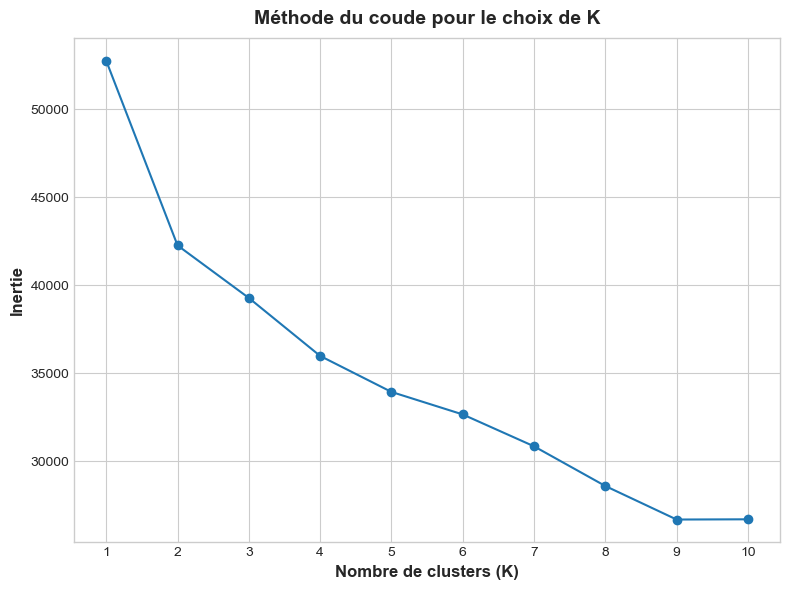

In [162]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Calcul de l'inertie pour différentes valeurs de K
inertias = []
for k in range(1, 11):  # On teste de 1 à 10 clusters
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Tracer la courbe de l'inertie pour chaque valeur de K
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertias, marker='o')
plt.title('Méthode du coude pour le choix de K')
plt.xlabel('Nombre de clusters (K)')
plt.ylabel('Inertie')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


#### b. Appliquer K-means avec le K optimal
Une fois le nombre optimal de clusters déterminé, nous appliquons le K-means pour créer les clusters.

In [167]:
# Choisir K optimal, ici supposons que le K optimal soit 3 (selon le graphique)
k = 10
kmeans = KMeans(n_clusters=k, random_state=0)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Affichage des résultats
df[['LogSalePrice', 'Cluster']].groupby('Cluster').mean()


,LogSalePrice
Cluster,
0,11.795700
1,12.072506
2,11.544027
3,12.141703
4,12.620845
5,12.620370
6,11.871016
7,12.038760
8,11.567013


Cela nous permet d'analyser les prix de vente moyens par cluster et de comprendre les caractéristiques des groupes créés par le K-means.

---

### Étapes pour créer les caractéristiques de distances au cluster

In [178]:
# Étape 1 : Fit-transform pour calculer les distances au centre des clusters
distances = kmeans.transform(X_scaled)

# Étape 2 : Étiqueter les colonnes correspondant aux distances
distance_features = [f"Distance_to_Cluster_{i}" for i in range(k)]

# Transformer les distances en DataFrame et les ajouter au dataset original
distances_df = pd.DataFrame(distances, columns=distance_features)
df = pd.concat([df, distances_df], axis=1)

# Vérification des nouvelles caractéristiques ajoutées
print(df[distance_features].head())


   Distance_to_Cluster_0  Distance_to_Cluster_1  Distance_to_Cluster_2  \
0               5.371527               2.840694               5.990479   
1               7.649604               8.604736               8.193804   
2               2.078274               3.061960               3.284485   
3               5.822590               3.834439               6.721726   
4               3.630168               3.463518               4.571679   

   Distance_to_Cluster_3  Distance_to_Cluster_4  Distance_to_Cluster_5  \
0               6.155446               5.912223               6.458966   
1               9.368142               9.505085              10.259912   
2               4.666392               5.401897               6.301093   
3               5.964836               4.489700               5.344451   
4               1.569084               4.170713               3.795934   

   Distance_to_Cluster_6  Distance_to_Cluster_7  Distance_to_Cluster_8  \
0               5.822309            

In [180]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Distance_to_Cluster_0,Distance_to_Cluster_1,Distance_to_Cluster_2,Distance_to_Cluster_3,Distance_to_Cluster_4,Distance_to_Cluster_5,Distance_to_Cluster_6,Distance_to_Cluster_7,Distance_to_Cluster_8,Distance_to_Cluster_9
0,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141.0,31770.0,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,5.371527,2.840694,5.990479,6.155446,5.912223,6.458966,5.822309,6.409674,8.249859,5.861726
1,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80.0,11622.0,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,7.649604,8.604736,8.193804,9.368142,9.505085,10.259912,8.975344,9.073019,10.155253,9.023683
2,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81.0,14267.0,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,2.078274,3.061960,3.284485,4.666392,5.401897,6.301093,4.004672,5.004031,6.675024,3.921176
3,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93.0,11160.0,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,...,5.822590,3.834439,6.721726,5.964836,4.489700,5.344451,5.806316,5.861658,7.559508,5.170624
4,Two_Story_1946_and_Newer,Residential_Low_Density,74.0,13830.0,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,3.630168,3.463518,4.571679,1.569084,4.170713,3.795934,4.163079,5.299249,7.282724,2.675301


**Supprimer les variables dont le score d'information mutuelles est égal 0**

In [188]:
# Identifions les colonnes avec des MI Scores de 0
zero_mi_cols = mi_scores[mi_scores == 0].index

# Suppression de ces colonnes du dataset
df_filtered = df.drop(columns=zero_mi_cols)

# Vérification des dimensions après suppression
print(f"Dimensions initiales : {df.shape}")
print(f"Dimensions après suppression des colonnes avec MI Scores = 0 : {df_filtered.shape}")

# Affichage des premières lignes pour vérifier
df_filtered.head()


Dimensions initiales : (2930, 100)
Dimensions après suppression des colonnes avec MI Scores = 0 : (2930, 96)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Distance_to_Cluster_0,Distance_to_Cluster_1,Distance_to_Cluster_2,Distance_to_Cluster_3,Distance_to_Cluster_4,Distance_to_Cluster_5,Distance_to_Cluster_6,Distance_to_Cluster_7,Distance_to_Cluster_8,Distance_to_Cluster_9
0,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141.0,31770.0,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,5.371527,2.840694,5.990479,6.155446,5.912223,6.458966,5.822309,6.409674,8.249859,5.861726
1,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80.0,11622.0,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,7.649604,8.604736,8.193804,9.368142,9.505085,10.259912,8.975344,9.073019,10.155253,9.023683
2,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81.0,14267.0,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,2.078274,3.061960,3.284485,4.666392,5.401897,6.301093,4.004672,5.004031,6.675024,3.921176
3,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93.0,11160.0,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,...,5.822590,3.834439,6.721726,5.964836,4.489700,5.344451,5.806316,5.861658,7.559508,5.170624
4,Two_Story_1946_and_Newer,Residential_Low_Density,74.0,13830.0,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,3.630168,3.463518,4.571679,1.569084,4.170713,3.795934,4.163079,5.299249,7.282724,2.675301


**Encoder les variables catégorielles**

In [191]:
# Identifier les variables catégorielles
categorical_cols = df_filtered.select_dtypes(include=["object", "category"]).columns

# Encodage des variables catégorielles
# Utilisation de One-Hot Encoding pour les colonnes catégorielles
df_encoded = pd.get_dummies(df_filtered, columns=categorical_cols, drop_first=True)

# Vérification des dimensions après encodage
print("Dimensions avant encodage :", df_filtered.shape)
print("Dimensions après encodage :", df_encoded.shape)

# Affichage des premières lignes du dataset encodé
df_encoded.head()


Dimensions avant encodage : (2930, 96)
Dimensions après encodage : (2930, 319)


,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,FirstFlrSF,SecondFlrSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_VWD,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,141.0,31770.0,1960,1960,112.0,2.0,441.0,1082.0,1656.0,0.0,...,False,False,False,False,True,False,False,False,True,False
1,80.0,11622.0,1961,1961,0.0,6.0,270.0,1032.0,896.0,0.0,...,False,False,False,False,True,False,False,False,True,False
2,81.0,14267.0,1958,1958,108.0,1.0,406.0,1330.0,1329.0,0.0,...,False,False,False,False,True,False,False,False,True,False
3,93.0,11160.0,1968,1968,0.0,1.0,1045.0,2111.0,2110.0,0.0,...,False,False,False,False,True,False,False,False,True,False
4,74.0,13830.0,1997,1998,0.0,3.0,137.0,931.0,928.0,701.0,...,False,False,False,False,True,False,False,False,True,False


# Modelisation XGBoost

In [193]:
X_top = df_encoded.copy()
y_top = X_top.pop('LogSalePrice')

In [200]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor

def score_dataset(X_top, y_top, model=XGBRegressor()):
    # La métrique pour la compétition Housing est RMSLE (Root Mean Squared Log Error)
    score = cross_val_score(
        model, X_top, y_top, cv=5, scoring="neg_mean_squared_log_error",
    )
    score = -1 * score.mean()
    score = np.sqrt(score)
    return score

score_dataset(X_top, y_top)

0.003630626613938528

Un score RMSLE (Root Mean Squared Log Error) aussi faible que **0.0036** est excellent, car il indique que les prédictions sont extrêmement proches des valeurs réelles. Cependant, il est toujours important de vérifier les points suivants pour s'assurer que ce résultat est représentatif et fiable :

---

### Étapes recommandées après cette évaluation :
1. **Vérifier la distribution des prédictions** :
   - Analysez la différence entre les prédictions et les valeurs réelles pour détecter tout biais.
   
2. **Tester différentes configurations de XGBoost** :
   - Ajustez les hyperparamètres du modèle, comme `learning_rate`, `max_depth`, ou `n_estimators`, pour voir si des améliorations sont possibles.
   - Exemple :
     ```python
     model = XGBRegressor(
         n_estimators=500,
         learning_rate=0.05,
         max_depth=6,
         random_state=0
     )
     score_dataset(X_top, y_top, model=model)
     ```

3. **Vérifier les variables les plus importantes** :
   - Identifiez les variables ayant la plus grande influence sur le modèle.
   - Exemple pour XGBoost :
     ```python
     model.fit(X_top, y_top)
     importance = model.feature_importances_
     features = pd.Series(importance, index=X_top.columns).sort_values(ascending=False)
     print(features.head(10))  # Afficher les 10 caractéristiques les plus importantes
     ```

4. **Vérifier le surapprentissage** :
   - Comparez les performances entre les ensembles d'entraînement et de validation pour vous assurer que le modèle généralise bien.
